In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from time import time

SIR Model for 2 populations:

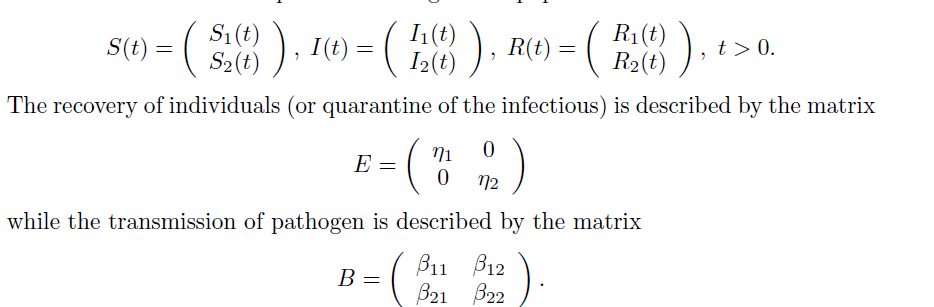
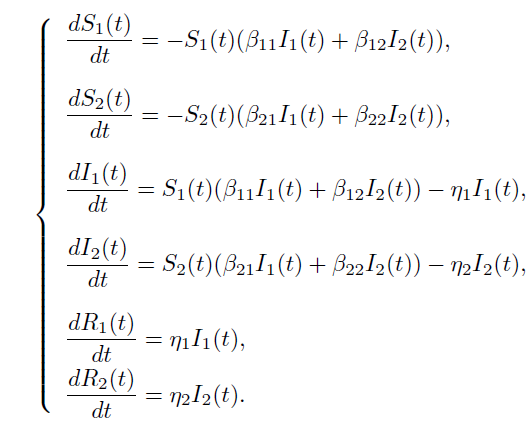

In [2]:
# Total population, N.
N1 = 1000
N2 = 4000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
S10, S20, I10, I20, R10, R20 = N1-1, N2-1, 1, 1, 0, 0      #First infected is in population 1
# Everyone else, S0, is susceptible to infection initially.
#S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#beta, gamma = 0.2, 1./10 
beta = np.array([[0.199,0.02],
                 [0.05,0.25]])

eta = [[0.3, 0],
       [0, 0.25]]

# compute R_0
L = beta*np.linalg.inv(eta)     #next generation method
eigvals = np.linalg.eigvals(L)
print("vector(R_0) = ", eigvals)
print("R_0 = ", max(eigvals))

# A grid of time points (in days)
t = np.linspace(0, 600, 300)

vector(R_0) =  [0.66333333 1.        ]
R_0 =  1.0


In [3]:
run -i Skeleton.py

In [4]:
# Initial conditions vector
y0 = S10, S20, I10, I20, R10, R20
# Integrate the SIR equations over the time grid, t.
tic = time()

ret = odeint(deriv2pop, y0, t, args=(beta, eta))
S_1, S_2, I_1, I_2, R_1, R_2 = ret.T #.T gives transpose

toc = time()
print("time:", toc-tic)

time: 0.007666826248168945


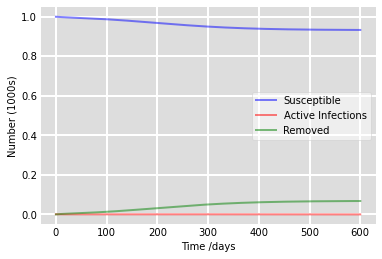

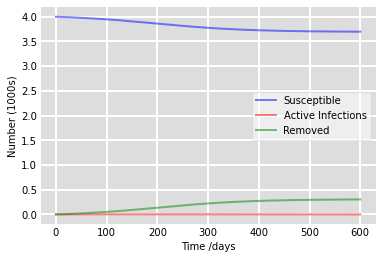

In [5]:
plot(S_1, I_1, R_1)
plot(S_2, I_2, R_2)

In [6]:
P1 = S_1 + I_1 + R_1
P2 = S_2 + I_2 + R_2

We use the formula below to find $R_0$

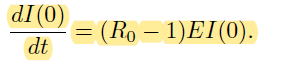

In [7]:
beta11 = beta[0][0]
beta12 = beta[0][1]
beta21 = beta[1][0]
beta22 = beta[1][1]

eta1 = eta[0][0]
eta2 = eta[1][1]

In [8]:
dI1dt0 = S_1[0] * (beta11 * I_1[0] + beta12 * I_2[0]) - eta1 * I_1[0]
dI2dt0 = S_2[0] * (beta21 * I_1[0] + beta22 * I_2[0]) - eta2 * I_2[0]

R_01 = dI1dt0/(eta1*I_1[0])+1

R_02 = dI2dt0/(eta2*I_2[0])+1
R_02

4798.8